# Import Libraries

In [50]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import platform
import time
import pathlib
import os

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.8.16
Tensorflow version: 2.9.2
Keras version: 2.9.0


# Unzip and Load dataset

In [51]:
!unzip '/content/Persian-WikiText-1.txt.zip'

Archive:  /content/Persian-WikiText-1.txt.zip
replace Persian-WikiText-1.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Persian-WikiText-1.txt  


In [52]:
filename = '/content/Persian-WikiText-1.txt'
text = open(filename, 'r', encoding='utf-8').read()

# Analyze the dataset

In [53]:
print('Length of text: {} characters'.format(len(text)))

Length of text: 56695909 characters


In [54]:
print(text[:1000])

عنوان مقاله: صفحهٔ اصلی

<templatestyles src="صفحه اصلی/



عنوان مقاله: ویکی پدیا

ویکی پدیا (کوته نوشت به صورت «وپ» و «WP») یک دانشنامه برخط چندزبانه مبتنی بر وب با محتوای آزاد و همکاری باز است که با همکاری افراد داوطلب نوشته می شود و هر کسی که به اینترنت و وب دسترسی داشته باشد می تواند مقالات آن را ببیند و ویرایش کند. نام ویکی پدیا واژه ای ترکیبی است که از واژه های ویکی (وبگاه مشارکتی) و اِنسایکلوپدیا (Encyclopedia) (دانشنامه یا دائرةالمعارف) گرفته شده است. هدف ویکی پدیا آفرینش و انتشار جهانی یک دانشنامه با محتوای آزاد به تمامی زبان های زندهٔ دنیا است.

ویکی پدیای انگلیسی در تاریخ ۱۵ ژانویه ۲۰۰۱ (۲۶ دی ۱۳۷۹) به صورت مکملی برای دانشنامهٔ تخصصی نیوپدیا نوشته شد. بنیان گذاران آن «جیمی ویلز» و «لری سنگر» هستند. هم اکنون بنیاد غیرانتفاعی ویکی مدیا پروژهٔ ویکی پدیا را پشتیبانی می کند. میزبان های اینترنتی اصلی این وبگاه در شهر تامپای فلوریدا هستند. همچنین میزبان های اضافی دیگری هم در شهرهای آمستردام و سئول به این وبگاه یاری می رسانند.

"ویکی پدیا" از پایان آوریل ۲۰۰۷ تا اکتبر ۲۰۱۹، یکی از 

In [55]:
text = text[:1000000]
text = text.lower()
text = text.replace('\n', ' ')

In [56]:
vocab = sorted(set(text))

print('{} unique characters'.format(len(vocab)))
print('vocab:', vocab)

193 unique characters
vocab: [' ', '!', '"', "'", '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '[', ']', '^', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '\xa0', '«', '»', '×', 'à', 'á', 'ã', 'ä', 'ç', 'é', 'ê', 'î', 'ā', 'ć', 'ē', 'ī', 'ń', 'ō', 'ś', 'ş', 'š', 'ˈ', 'ά', 'ή', 'ί', 'α', 'β', 'γ', 'δ', 'ε', 'θ', 'ι', 'λ', 'μ', 'ν', 'ξ', 'ο', 'ρ', 'ς', 'τ', 'ω', 'а', 'е', 'и', 'м', 'н', 'п', 'р', 'т', 'у', 'я', '،', '؛', '؟', 'ء', 'آ', 'أ', 'ؤ', 'ئ', 'ا', 'ب', 'ة', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ـ', 'ف', 'ق', 'ل', 'م', 'ن', 'ه', 'و', 'ي', 'ً', 'َ', 'ُ', 'ِ', 'ّ', 'ْ', 'ٔ', '٪', '٫', '٬', 'ٰ', 'پ', 'چ', 'ژ', 'ک', 'گ', 'ۀ', 'ی', '۰', '۱', '۲', '۳', '۴', '۵', '۶', '۷', '۸', '۹', 'ἀ', 'ἑ', 'ὁ', 'ὔ', 'ὕ', 'ῆ', '\u200d', '\u200e', '–', '—', '‚', '“', '”', '„', '…', '→', '∞

# Process the dataset

### Vectorize the text

Before feeding the text to our RNN we need to convert the text from a sequence of characters to a sequence of numbers. To do so we will detect all unique characters in the text, form a vocabulary out of it and replace each character with its index in the vocabulary.

In [57]:
char_to_int = {char: index for index, char in enumerate(vocab)}

print('{')
for char, _ in zip(char_to_int, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char_to_int[char]))
print('  ...\n}')

{
  ' ' :   0,
  '!' :   1,
  '"' :   2,
  "'" :   3,
  '(' :   4,
  ')' :   5,
  '+' :   6,
  ',' :   7,
  '-' :   8,
  '.' :   9,
  '/' :  10,
  '0' :  11,
  '1' :  12,
  '2' :  13,
  '3' :  14,
  '4' :  15,
  '5' :  16,
  '6' :  17,
  '7' :  18,
  '8' :  19,
  ...
}


In [58]:
int_to_char = np.array(vocab)
print(int_to_char)

[' ' '!' '"' "'" '(' ')' '+' ',' '-' '.' '/' '0' '1' '2' '3' '4' '5' '6'
 '7' '8' '9' ':' ';' '<' '=' '>' '[' ']' '^' '_' 'a' 'b' 'c' 'd' 'e' 'f'
 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x'
 'y' 'z' '{' '|' '}' '\xa0' '«' '»' '×' 'à' 'á' 'ã' 'ä' 'ç' 'é' 'ê' 'î'
 'ā' 'ć' 'ē' 'ī' 'ń' 'ō' 'ś' 'ş' 'š' 'ˈ' 'ά' 'ή' 'ί' 'α' 'β' 'γ' 'δ' 'ε'
 'θ' 'ι' 'λ' 'μ' 'ν' 'ξ' 'ο' 'ρ' 'ς' 'τ' 'ω' 'а' 'е' 'и' 'м' 'н' 'п' 'р'
 'т' 'у' 'я' '،' '؛' '؟' 'ء' 'آ' 'أ' 'ؤ' 'ئ' 'ا' 'ب' 'ة' 'ت' 'ث' 'ج' 'ح'
 'خ' 'د' 'ذ' 'ر' 'ز' 'س' 'ش' 'ص' 'ض' 'ط' 'ظ' 'ع' 'غ' 'ـ' 'ف' 'ق' 'ل' 'م'
 'ن' 'ه' 'و' 'ي' 'ً' 'َ' 'ُ' 'ِ' 'ّ' 'ْ' 'ٔ' '٪' '٫' '٬' 'ٰ' 'پ' 'چ' 'ژ'
 'ک' 'گ' 'ۀ' 'ی' '۰' '۱' '۲' '۳' '۴' '۵' '۶' '۷' '۸' '۹' 'ἀ' 'ἑ' 'ὁ' 'ὔ'
 'ὕ' 'ῆ' '\u200d' '\u200e' '–' '—' '‚' '“' '”' '„' '…' '→' '∞' 'ﷲ']


# Convert chars in text to indices.

In [59]:
text_as_int = np.array([char_to_int[char] for char in text])

print('text_as_int length: {}'.format(len(text_as_int)))
print('{} --> {}'.format(repr(text[:15]), repr(text_as_int[:15])))

text_as_int length: 1000000
'عنوان مقاله: صف' --> array([136, 143, 145, 118, 143,   0, 142, 140, 118, 141, 144,  21,   0,
       132, 139])


## Create training sequences

In [60]:
sequence_length = 100
examples_per_epoch = len(text) // (sequence_length + 1)

print('examples_per_epoch:', examples_per_epoch)

examples_per_epoch: 9900


Create training dataset.
tf.data.Dataset.from_tensor_slices used to convert it to tensor based dataset called


In [61]:
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int) 

for char in char_dataset.take(5):
    print(int_to_char[char.numpy()])

ع
ن
و
ا
ن


In [62]:
for char in char_dataset.take(5):
    print(char.numpy())

136
143
145
118
143


mapping indices with characters in text                                       
The batch method lets us easily convert these individual characters to sequences of the desired size.

In [63]:
sequences = char_dataset.batch(sequence_length + 1, drop_remainder=True)

print('Sequences count: {}'.format(len(list(sequences.as_numpy_iterator()))));
print()

for item in sequences.take(3):
    print(repr(''.join(int_to_char[item.numpy()])))

Sequences count: 9900

'عنوان مقاله: صفحهٔ اصلی  <templatestyles src="صفحه اصلی/    عنوان مقاله: ویکی پدیا  ویکی پدیا (کوته ن'
'وشت به صورت «وپ» و «wp») یک دانشنامه برخط چندزبانه مبتنی بر وب با محتوای آزاد و همکاری باز است که با '
'همکاری افراد داوطلب نوشته می شود و هر کسی که به اینترنت و وب دسترسی داشته باشد می تواند مقالات آن را '


In [64]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

In [65]:
dataset = sequences.map(split_input_target)

print('dataset size: {}'.format(len(list(dataset.as_numpy_iterator()))))

dataset size: 9900


In [66]:
for input_example, target_example in dataset.take(5):
    print('Input sequence size:', repr(len(input_example.numpy())))
    print('Target sequence size:', repr(len(target_example.numpy())))
    print()
    print('Input:', repr(''.join(int_to_char[input_example.numpy()])))
    print('Target:', repr(''.join(int_to_char[target_example.numpy()])))

Input sequence size: 100
Target sequence size: 100

Input: 'عنوان مقاله: صفحهٔ اصلی  <templatestyles src="صفحه اصلی/    عنوان مقاله: ویکی پدیا  ویکی پدیا (کوته '
Target: 'نوان مقاله: صفحهٔ اصلی  <templatestyles src="صفحه اصلی/    عنوان مقاله: ویکی پدیا  ویکی پدیا (کوته ن'
Input sequence size: 100
Target sequence size: 100

Input: 'وشت به صورت «وپ» و «wp») یک دانشنامه برخط چندزبانه مبتنی بر وب با محتوای آزاد و همکاری باز است که با'
Target: 'شت به صورت «وپ» و «wp») یک دانشنامه برخط چندزبانه مبتنی بر وب با محتوای آزاد و همکاری باز است که با '
Input sequence size: 100
Target sequence size: 100

Input: 'همکاری افراد داوطلب نوشته می شود و هر کسی که به اینترنت و وب دسترسی داشته باشد می تواند مقالات آن را'
Target: 'مکاری افراد داوطلب نوشته می شود و هر کسی که به اینترنت و وب دسترسی داشته باشد می تواند مقالات آن را '
Input sequence size: 100
Target sequence size: 100

Input: 'ببیند و ویرایش کند. نام ویکی پدیا واژه ای ترکیبی است که از واژه های ویکی (وبگاه مشارکتی) و اِنسایکلو'
Target: 'بیند و ویر

## Split training sequences into batches

We used `tf.data` to split the text into manageable sequences. But before feeding this data into the model, we need to shuffle the data and pack it into batches.

In [67]:
BATCH_SIZE = 64

BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

In [68]:
for input_text, target_text in dataset.take(1):
    print('1st batch: input_text:', input_text)
    print()
    print('1st batch: target_text:', target_text)

1st batch: input_text: tf.Tensor(
[[123 126 164 ... 128 164   0]
 [118   0 142 ... 162 118 128]
 [143 142 164 ... 129   0 114]
 ...
 [118 129   0 ... 110   0 118]
 [121 118 126 ... 126   9   0]
 [164   0 158 ... 125 132   0]], shape=(64, 100), dtype=int64)

1st batch: target_text: tf.Tensor(
[[126 164 126 ... 164   0 131]
 [  0 142 124 ... 118 128   0]
 [142 164   0 ...   0 114 143]
 ...
 [129   0 126 ...   0 118 124]
 [118 126 144 ...   9   0   0]
 [  0 158 118 ... 132   0 143]], shape=(64, 100), dtype=int64)


## Build the model


In [69]:
tmp_vocab_size = 10
tmp_embeding_size = 5
tmp_input_length = 8
tmp_batch_size = 2

tmp_model = tf.keras.models.Sequential()
tmp_model.add(tf.keras.layers.Embedding(
  input_dim=tmp_vocab_size,
  output_dim=tmp_embeding_size,
  input_length=tmp_input_length
))

tmp_input_array = np.random.randint(
  low=0,
  high=tmp_vocab_size,
  size=(tmp_batch_size, tmp_input_length)
)
tmp_model.compile('rmsprop', 'mse')
tmp_output_array = tmp_model.predict(tmp_input_array)

print('tmp_input_array shape:', tmp_input_array.shape)
print('tmp_input_array:')
print(tmp_input_array)
print()
print('tmp_output_array shape:', tmp_output_array.shape)
print('tmp_output_array:')
print(tmp_output_array)

1/1 [==============================] - 0s 30ms/step
tmp_input_array shape: (2, 8)
tmp_input_array:
[[6 7 1 0 8 7 3 1]
 [3 3 4 6 5 7 8 9]]

tmp_output_array shape: (2, 8, 5)
tmp_output_array:
[[[ 0.04151643  0.0231167  -0.01633751  0.04286773 -0.04355152]
  [ 0.00938495 -0.02481067 -0.00164186 -0.04929398  0.03796215]
  [-0.02659696  0.01000335 -0.01204795  0.00277163 -0.04279613]
  [ 0.02749233 -0.04163154 -0.00950166 -0.03677778 -0.01918316]
  [ 0.04129417 -0.00156484 -0.01150776 -0.01143966 -0.00873854]
  [ 0.00938495 -0.02481067 -0.00164186 -0.04929398  0.03796215]
  [ 0.00959905 -0.00973655  0.01685197  0.03035713  0.00869547]
  [-0.02659696  0.01000335 -0.01204795  0.00277163 -0.04279613]]

 [[ 0.00959905 -0.00973655  0.01685197  0.03035713  0.00869547]
  [ 0.00959905 -0.00973655  0.01685197  0.03035713  0.00869547]
  [-0.0231456   0.0124297   0.02502442  0.03341163 -0.03482996]
  [ 0.04151643  0.0231167  -0.01633751  0.04286773 -0.04355152]
  [ 0.04394991 -0.01423509  0.03190817 

In [70]:
# Length of the vocabulary in chars.
vocab_size = len(vocab)

# The embedding dimension.
embedding_dim = 256 # 256 bcz the maximum value of ASCII code is 256

# Number of RNN units.
rnn_units = 1024

In [71]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Embedding(
      input_dim=vocab_size,
      output_dim=embedding_dim,
      batch_input_shape=[batch_size, None]
    ))

    model.add(tf.keras.layers.LSTM(
      units=rnn_units,
      return_sequences=True,
      stateful=True,
      recurrent_initializer=tf.keras.initializers.GlorotNormal()
    ))

    model.add(tf.keras.layers.Dense(vocab_size)) 
    return model

In [110]:
model = build_model(
    vocab_size=len(vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE)

In [73]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (64, None, 256)           49408     
                                                                 
 lstm_3 (LSTM)               (64, None, 1024)          5246976   
                                                                 
 dense_3 (Dense)             (64, None, 193)           197825    
                                                                 
Total params: 5,494,209
Trainable params: 5,494,209
Non-trainable params: 0
_________________________________________________________________


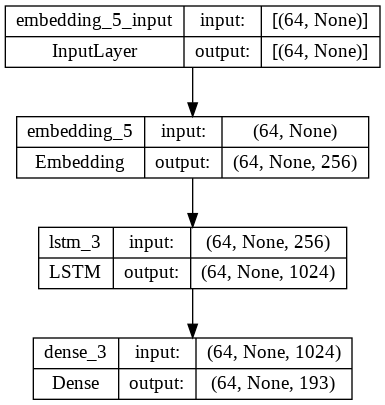

In [74]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

## Train the model


### Attach an optimizer, and a loss function

The standard tf.keras.losses.sparse_categorical_crossentropy loss function works in this case because it is applied across the last dimension of the predictions.

Because your model returns logits, you need to set the from_logits flag.

# Calculate perplexity in Loss

In [75]:
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(
      y_true=labels,
      y_pred=logits,
      from_logits=True
    )


In [111]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=loss
)

### Configure checkpoints

Use a tf.keras.callbacks.ModelCheckpoint to ensure that checkpoints are saved during training:

In [77]:
checkpoint_dir = 'tmp/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, 'LSTM_Model_{epoch}')

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

In [112]:
EPOCHS = 40

In [113]:
history = model.fit(
  x=dataset,
  epochs=EPOCHS,
  callbacks=[
    checkpoint_callback
  ]
)

Epoch 1/40
154/154 [==============================] - 13s 71ms/step - loss: 2.8213
Epoch 2/40
154/154 [==============================] - 12s 73ms/step - loss: 2.4571
Epoch 3/40
154/154 [==============================] - 12s 73ms/step - loss: 2.2384
Epoch 4/40
154/154 [==============================] - 12s 72ms/step - loss: 2.0398
Epoch 5/40
154/154 [==============================] - 12s 69ms/step - loss: 1.8873
Epoch 6/40
154/154 [==============================] - 12s 72ms/step - loss: 1.7830
Epoch 7/40
154/154 [==============================] - 13s 74ms/step - loss: 1.7095
Epoch 8/40
154/154 [==============================] - 12s 74ms/step - loss: 1.6536
Epoch 9/40
154/154 [==============================] - 12s 72ms/step - loss: 1.6115
Epoch 10/40
154/154 [==============================] - 12s 71ms/step - loss: 1.5764
Epoch 11/40
154/154 [==============================] - 12s 71ms/step - loss: 1.5466
Epoch 12/40
154/154 [==============================] - 12s 71ms/step - loss: 1.5199
E

In [114]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

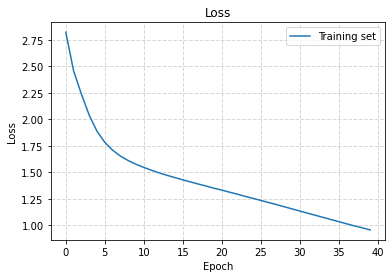

In [115]:
render_training_history(history)

## Generate text

### Restore the latest checkpoint


In [116]:
tf.train.latest_checkpoint(checkpoint_dir)

'tmp/checkpoints/LSTM_Model_40'

In [117]:
simplified_batch_size = 1

model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([simplified_batch_size, None]))
model.reset_states()

In [118]:
def predict_characters(base_model, char_num, starting_text):
    input_eval = [char_to_int[s] for s in starting_text]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = [starting_text]
    for i in range(char_num):
        predictions = base_model.predict(input_eval, verbose=0)
        predictions = tf.squeeze(predictions, 0)
        predicted_ids = np.array(predictions.numpy()).argmax(axis=1).reshape(-1, 1)[-1][0]
        message = np.append(input_eval[0].numpy(), predicted_ids)[1:]
        input_eval = tf.expand_dims(message, 0)
        text_generated.append(int_to_char[predicted_ids])
        
    for i in ''.join(text_generated).split('\n'):
        print(i)

In [140]:
predict_characters(model, 80, 'مرز ایران')

مرز ایرانی را در مورد بررسی می شود. به همین دلیل نیز از سال ۱۳۸۳ خورشیدی و انجمن مهندسان 
